<h1>                              Smart AI GYM Assistant</h1>

### Introduction:

To live long and live healthy, it’s really important to do some physical activities in our daily routine. But we always run behind money and end our day in stress. To overcome this and to have a balanced life cycle one must practice yoga or any physical activity that relieves stress. Nowadays, yoga has gained worldwide attention due to increased stress levels in the modern lifestyle. +e word yoga means deep association and union of mind with the body. It is used to keep both mind and body in equilibration in all flip-flops of life by means of asana, meditation, and several other techniques.

There are many ways to practice yoga, like Yoga centers, Temples, etc. But due to the busy life people tend to self-taught themselves. But in self-learning, one may not find an incorrect pose. Incorrect posture while performing yoga can lead to serious harm to muscles and ligaments of the body. Thus, to prevent this we present an intuitive approach based on deep learning techniques to correct the practitioner’s pose while performing various yoga asanas. The proposed system is aimed at providing concise feedback to the practitioner so they can able to perform yoga poses correctly and assist them in identifying the incorrect poses and suggest proper feedback for improvement in order to prevent injuries as well as increase their knowledge of a particular yoga pose.


### ML Formulation:

This can be formulated as a machine learning classification problem, where we first need to estimate the pose (Asanas) that practitioner wants to perform. Once the pose prediction was done, we can perform some geometrical analysis on the pose and generate precise feedback to the practitioner.


### Business Constraints:

1.	Strict latency requirement:

Our model must be able to estimate the pose fast within seconds.

2.	Cost of misclassification:

If our model predicts one pose instead of other then our whole process generates different feedback and it becomes a mess. So, there should be no misclassification.



### Data source:

https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset

it contains 5 yoga poses

1.	Down dog
2.	Goddess
3.	Plank
4.	Tree
5.	Warrior

### Performance metrics:

1.	Confusion matrix
2.	Area under curve (AUC)
3.	F1 score


### References:

1.	https://link.springer.com/article/10.1007/s11227-021-04076-w

2.	https://arxiv.org/abs/2004.10362

3.	Yog-Guru: Real-Time Yoga Pose Correction System Using Deep Learning Methods | IEEE Conference Publication | IEEE Xplore

4.	https://www.itm-conferences.org/articles/itmconf/pdf/2021/05/itmconf_icacc2021_03031.pdf

In [16]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Data Overview
1.	The dataset we have had only 5 poses, which are plank, warrior2, tree, Goddess, downdog. These are particular yoga poses.
2.	Our aim is to predict the pose and correct the pose in live (through cameras), if we train our model with this dataset our model may not be able to identify the ideal pose or the standing pose while relaxing and can lead to issues related to feedback to correct our pose.
3.	So, for that I manually added some random 100 standing pose images of men and women to train data and 20 standing poses to the test data.


#### Train data

In [2]:
BASE_PATH="C:/Users/HP/Downloads/case study2/DATASET/"
filenames,labels = [],[]

for dirname in os.listdir(f'{BASE_PATH}TRAIN'):
    
    for file in os.listdir(f'{BASE_PATH}TRAIN/{dirname}'):
        filenames.append(BASE_PATH+"TRAIN/"+dirname+"/"+file)
        labels.append(dirname)
        
df_train = pd.DataFrame(data={
    'filename': filenames,
    'labels': labels
})

In [3]:
df_train.head()

filename   labels
0  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog
1  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog
2  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog
3  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog
4  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog

In [4]:
df_train.labels.value_counts()

plank       266
warrior2    252
downdog     223
goddess     180
tree        159
standing    101
Name: labels, dtype: int64

1. we can see that train data have 6 labels (plank, warrior2, downdog, goddess, tree, standing)
2. total images corresponding to each class labels are not same.
3. we have more images for plank and less for standing.

In [5]:
train_labels=df_train.labels.value_counts().to_dict()
train_labels

{'plank': 266,
 'warrior2': 252,
 'downdog': 223,
 'goddess': 180,
 'tree': 159,
 'standing': 101}

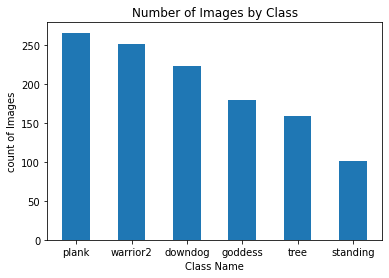

In [6]:
#distribution of images among classes
plt.bar(train_labels.keys(), train_labels.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('count of Images');

In [7]:
#function to return dimensions
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    
    try:
        h,w,d=arr.shape
    except:
        h,w=arr.shape
        d=1
        
    return h,w,d

In [8]:
df_train['shape']=df_train['filename'].apply(get_dims)

In [9]:
#calculating height, weight, channels and aspect ratio in an image

df_train['height']=df_train['shape'].apply(lambda x: x[0])
df_train['width']=df_train['shape'].apply(lambda x: x[1])
df_train['channels']=df_train['shape'].apply(lambda x: x[2])
df_train['aspect_ratio']=df_train['shape'].apply(lambda x: x[1]/x[0])
df_train=df_train.drop(['shape'],axis=1)

In [10]:
df_train.head()

filename   labels  height  width  \
0  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog     564    851   
1  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog     463    696   
2  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog     850   1200   
3  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog     335    493   
4  C:/Users/HP/Downloads/case study2/DATASET/TRAI...  downdog     706   1499   

   channels  aspect_ratio  
0         3      1.508865  
1         3      1.503240  
2         3      1.411765  
3         3      1.471642  
4         3      2.123229

In [11]:
df_train['channels'].value_counts()

3    1123
4      43
1      15
Name: channels, dtype: int64

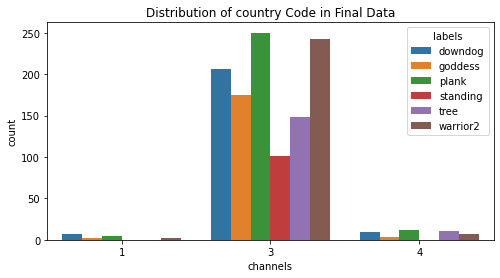

In [12]:
#distribution of channels over class labels
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='channels', data=df_train, hue='labels')
plt.title('Distribution of country Code in Final Data')
plt.show()

### Observations:
1. Most of the images in dataset have 3 channels
2. few images have 1 channel and few images contain algha channel also
3. All standing images are having 3 channels only

### Analysing height and width of all images

            height        width     channels  aspect_ratio
count  1181.000000  1181.000000  1181.000000   1181.000000
mean    703.485182   892.361558     3.011008      1.304593
std     523.934294   699.479532     0.295240      0.429078
min      75.000000    75.000000     1.000000      0.360000
25%     393.000000   525.000000     3.000000      1.000000
50%     581.000000   740.000000     3.000000      1.349948
75%     800.000000  1200.000000     3.000000      1.642857
max    4272.000000  6410.000000     4.000000      3.200000


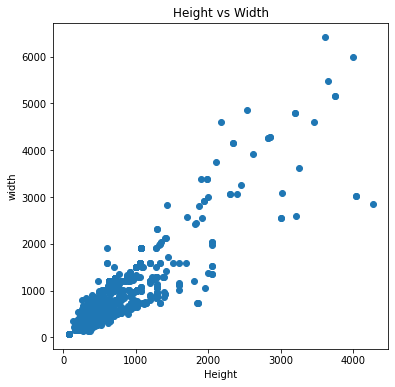

In [13]:
# Plot Scatterplot Height vs width
plt.figure(figsize=(6,6))
print(df_train.describe())
plt.scatter(df_train.height,df_train.width)
plt.xlabel('Height')
plt.ylabel('width')
plt.title('Height vs Width')
plt.show()

### Analysing Height and width of images respective to thair classes

####################################### downdog #########3###################################
            height        width    channels  aspect_ratio
count   223.000000   223.000000  223.000000    223.000000
mean    632.704036   894.771300    2.982063      1.470074
std     445.918924   614.536855    0.413338      0.341278
min     150.000000   160.000000    1.000000      0.551827
25%     370.000000   599.000000    3.000000      1.333333
50%     506.000000   735.000000    3.000000      1.498127
75%     720.000000  1024.000000    3.000000      1.693435
max    3246.000000  4288.000000    4.000000      2.666667


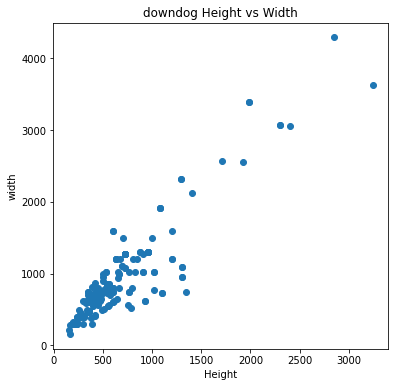

####################################### goddess #########3###################################
            height        width    channels  aspect_ratio
count   180.000000   180.000000  180.000000    180.000000
mean    706.488889   924.322222    2.994444      1.323735
std     536.986611   776.129954    0.247834      0.395559
min      80.000000    80.000000    1.000000      0.400000
25%     414.000000   572.500000    3.000000      1.000000
50%     600.000000   730.000000    3.000000      1.336976
75%     800.000000  1200.000000    3.000000      1.589041
max    3200.000000  4800.000000    4.000000      2.996255


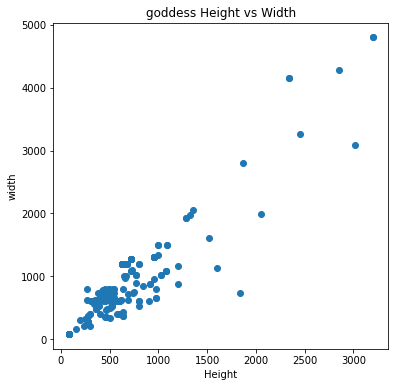

####################################### plank #########3###################################
            height        width    channels  aspect_ratio
count   266.000000   266.000000  266.000000    266.000000
mean    652.469925   953.052632    3.015038      1.473696
std     385.131530   629.408082    0.324705      0.342444
min      75.000000    75.000000    1.000000      0.700000
25%     402.250000   600.000000    3.000000      1.268148
50%     579.500000   763.500000    3.000000      1.498478
75%     720.000000  1275.000000    3.000000      1.777778
max    2612.000000  4854.000000    4.000000      2.682927


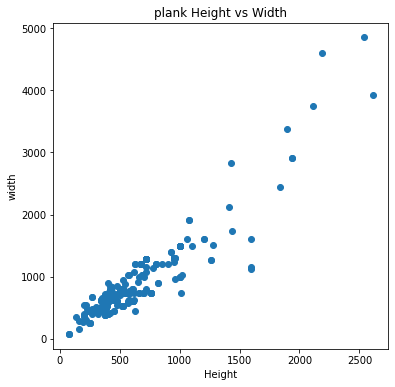

####################################### standing #########3###################################
            height        width  channels  aspect_ratio
count   101.000000   101.000000     101.0    101.000000
mean    467.099010   335.970297       3.0      0.706663
std     364.406737   313.894487       0.0      0.172192
min     183.000000   135.000000       3.0      0.360000
25%     275.000000   183.000000       3.0      0.628975
50%     280.000000   192.000000       3.0      0.665455
75%     519.000000   339.000000       3.0      0.711111
max    2048.000000  2048.000000       3.0      1.502732


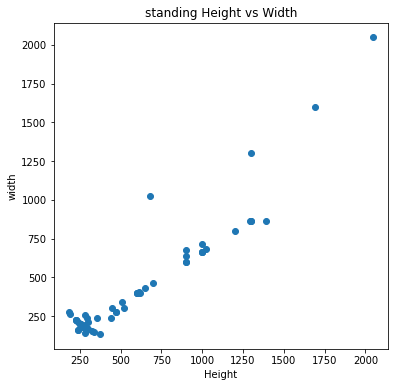

####################################### tree #########3###################################
           height        width    channels  aspect_ratio
count   159.00000   159.000000  159.000000    159.000000
mean    980.81761   959.981132    3.069182      1.050220
std     745.57733   729.824216    0.254566      0.450155
min     200.00000   150.000000    3.000000      0.399137
25%     504.50000   555.000000    3.000000      0.666667
50%     750.00000   740.000000    3.000000      0.850000
75%    1134.00000  1200.000000    3.000000      1.500000
max    4272.00000  5472.000000    4.000000      1.931217


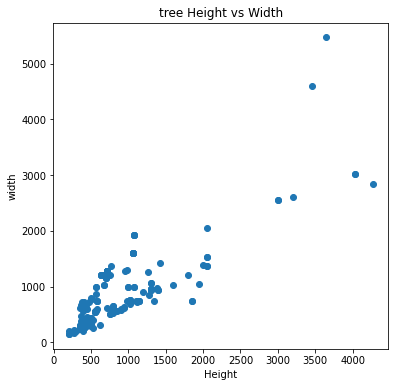

####################################### warrior2 #########3###################################
            height        width    channels  aspect_ratio
count   252.000000   252.000000  252.000000    252.000000
mean    737.583333   983.670635    3.011905      1.366130
std     519.603692   776.713163    0.244169      0.379734
min     179.000000   202.000000    1.000000      0.563063
25%     427.500000   608.250000    3.000000      1.000000
50%     675.000000   740.000000    3.000000      1.401869
75%     800.000000  1200.000000    3.000000      1.697626
max    4000.000000  6410.000000    4.000000      3.200000


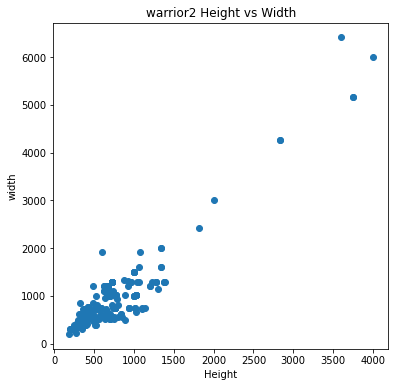

In [14]:
for label in list(df_train['labels'].unique()):
    plt.figure(figsize=(6,6))
    df=df_train[df_train['labels']==label]
    print("#######################################",label,"#########3###################################")
    print(df.describe())
    plt.scatter(df.height,df.width)
    plt.xlabel('Height')
    plt.ylabel('width')
    plt.title(label+' Height vs Width')
    plt.show()

### fix the target image size
1. by observing all the image size plots, we can see that arroung 75% images have size less than 800*1200
2. its really important to chose optimal size, because upsampling and downsampling will be made to reach target size. so some important info can be lost and padding is introduced.
3. so we analyze and see how different sizes helps in differentiating.
4. sizes we will test (256,256),(512,512),(800,800) and these are considered by the above analysis.

### Analysing image sizes

#### Converting all the classes images into arrays

In [17]:
#setting the trai and test directories
train_dir="C:/Users/HP/Downloads/case study2/DATASET/TRAIN"
test_dir="C:/Users/HP/Downloads/case study2/DATASET/TEST"

def img2np(filename, size = (512,512)):
    # iterating through each file
    for fn in os.listdir(filename):
        fp=filename+fn
        
        #reading an image
        current_image = cv2.imread(fp, 1) 
        current_image = cv2.resize(current_image,size)
        current_image=cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
        
        # covert image to a matrix
        img_ts=np.array(current_image)
        
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat


size=(256,256)
downdog_images_256 = img2np(f'{train_dir}/downdog/', size)
plank_images_256 = img2np(f'{train_dir}/plank/', size)
warrior2_images_256 = img2np(f'{train_dir}/warrior2/', size)
goddess_images_256 = img2np(f'{train_dir}/goddess/', size)
tree_images_256 = img2np(f'{train_dir}/tree/', size)
standing_images_256 = img2np(f'{train_dir}/standing/', size)

size=(512,512)
downdog_images_512 = img2np(f'{train_dir}/downdog/', size)
plank_images_512 = img2np(f'{train_dir}/plank/', size)
warrior2_images_512 = img2np(f'{train_dir}/warrior2/', size)
goddess_images_512 = img2np(f'{train_dir}/goddess/', size)
tree_images_512 = img2np(f'{train_dir}/tree/', size)
standing_images_512 = img2np(f'{train_dir}/standing/', size)

size=(800,800)
downdog_images_800 = img2np(f'{train_dir}/downdog/', size)
plank_images_800 = img2np(f'{train_dir}/plank/', size)
warrior2_images_800 = img2np(f'{train_dir}/warrior2/', size)
goddess_images_800 = img2np(f'{train_dir}/goddess/', size)
tree_images_800 = img2np(f'{train_dir}/tree/', size)
standing_images_800 = img2np(f'{train_dir}/standing/', size)


#### Finding the mean_image

In [18]:
def find_mean_img(full_mat, title, size):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    mean_img=mean_img/255
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

######################  mean images of size 256*256  ################################


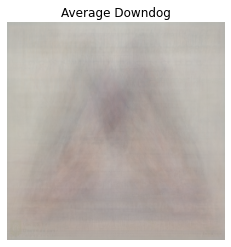

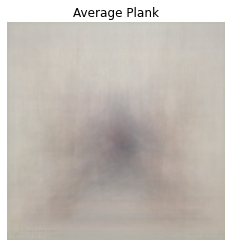

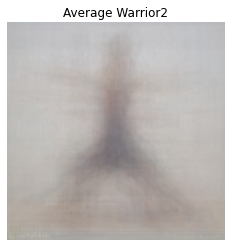

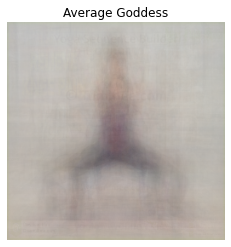

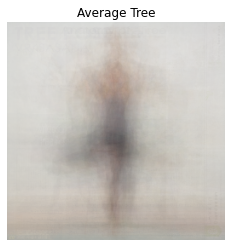

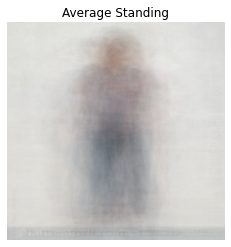

######################  mean images of size 512*512  ################################


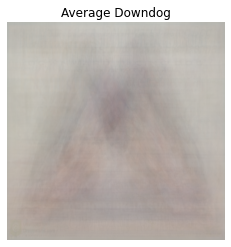

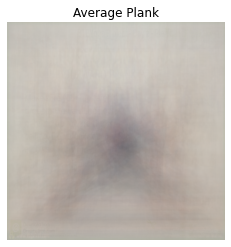

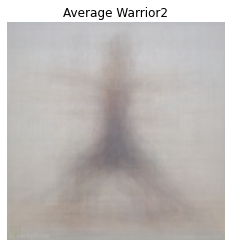

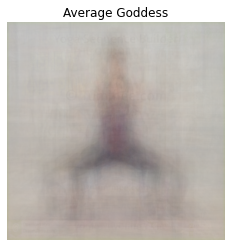

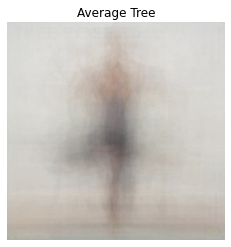

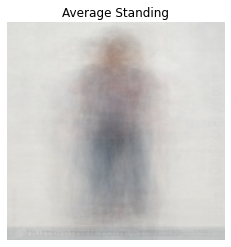

######################  mean images of size 800*800  ################################


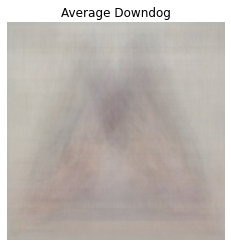

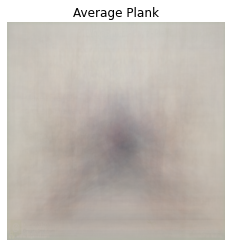

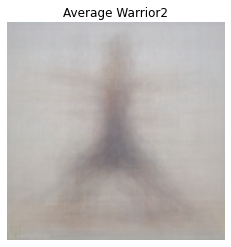

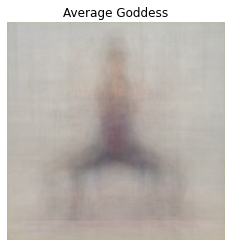

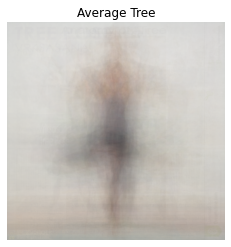

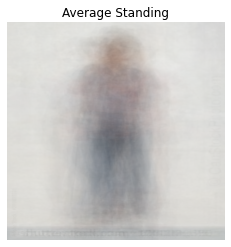

In [19]:
print("######################  mean images of size 256*256  ################################")
size=(256,256,3)
downdog_mean_256 = find_mean_img(downdog_images_256, 'Downdog',size)
plank_mean_256 = find_mean_img(plank_images_256, 'Plank',size)
warrior2_mean_256 = find_mean_img(warrior2_images_256, 'Warrior2',size)
goddess_mean_256 = find_mean_img(goddess_images_256, 'Goddess',size)
tree_mean_256 = find_mean_img(tree_images_256, 'Tree',size)
standing_mean_256 = find_mean_img(standing_images_256, 'Standing',size)

print("######################  mean images of size 512*512  ################################")
size=(512,512,3)
downdog_mean_512 = find_mean_img(downdog_images_512, 'Downdog',size)
plank_mean_512 = find_mean_img(plank_images_512, 'Plank',size)
warrior2_mean_512 = find_mean_img(warrior2_images_512, 'Warrior2',size)
goddess_mean_512 = find_mean_img(goddess_images_512, 'Goddess',size)
tree_mean_512 = find_mean_img(tree_images_512, 'Tree',size)
standing_mean_512 = find_mean_img(standing_images_512, 'Standing',size)


print("######################  mean images of size 800*800  ################################")
size=(800,800,3)
downdog_mean_800 = find_mean_img(downdog_images_800, 'Downdog',size)
plank_mean_800 = find_mean_img(plank_images_800, 'Plank',size)
warrior2_mean_800 = find_mean_img(warrior2_images_800, 'Warrior2',size)
goddess_mean_800 = find_mean_img(goddess_images_800, 'Goddess',size)
tree_mean_800 = find_mean_img(tree_images_800, 'Tree',size)
standing_mean_800 = find_mean_img(standing_images_800, 'Standing',size)

### Checking how mean image of one class differ from other class mean image

#### mean image differences of size 256*256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


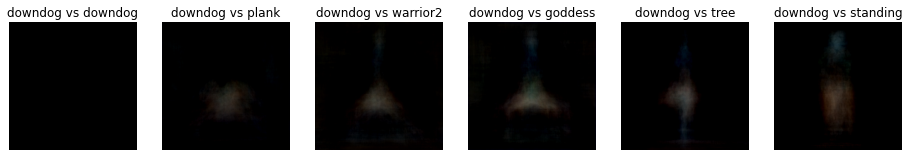

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


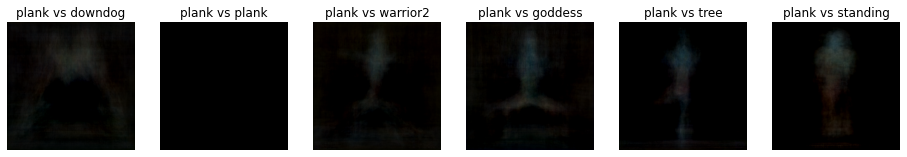

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


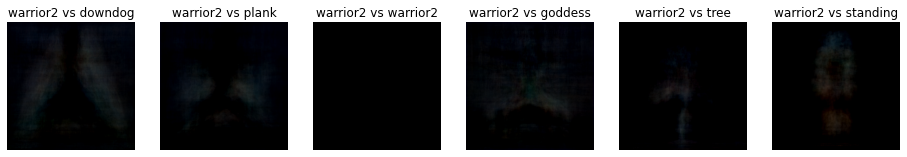

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


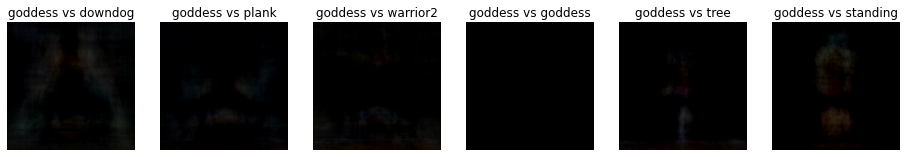

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


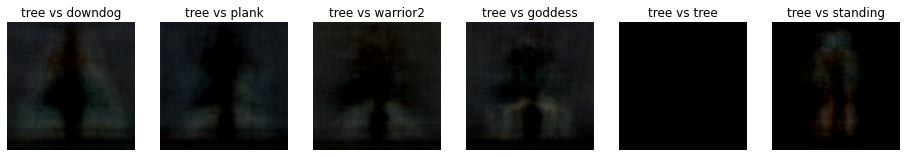

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


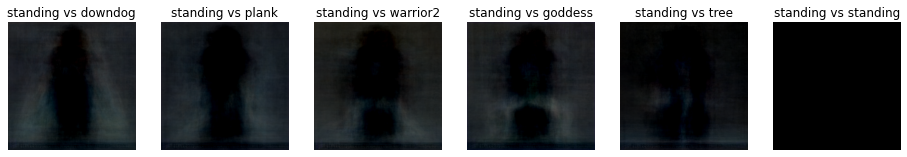

In [20]:
mean_images=[downdog_mean_256, plank_mean_256 , warrior2_mean_256 ,goddess_mean_256 ,tree_mean_256 ,standing_mean_256]
labels=['downdog', 'plank' , 'warrior2' ,'goddess' ,'tree' ,'standing']
n=len(mean_images)

for i in range(len(mean_images)):
    plt.figure(figsize=(16, 5))
    for j in range(len(mean_images)):
        contrast_mean = mean_images[i]-mean_images[j]
        plt.subplot(1, n, j + 1)
        plt.imshow(contrast_mean, cmap='bwr')
        plt.title(f'{labels[i]} vs {labels[j]}')
        plt.axis('off')
    plt.show()

#### mean image differences of size 512*512

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


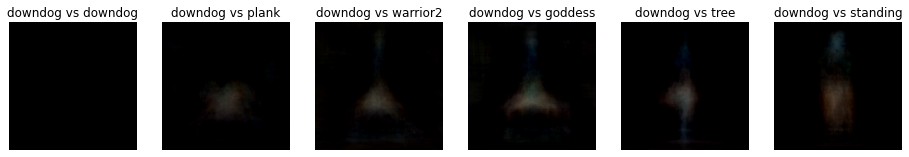

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


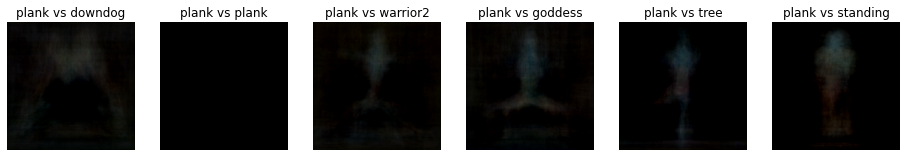

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


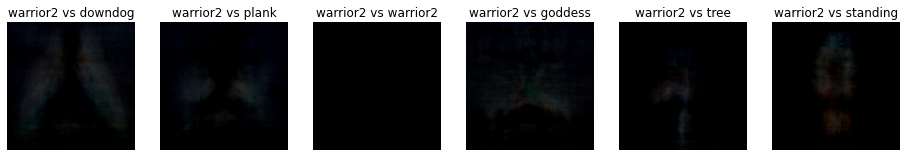

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


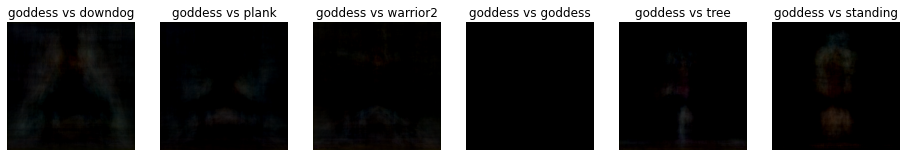

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


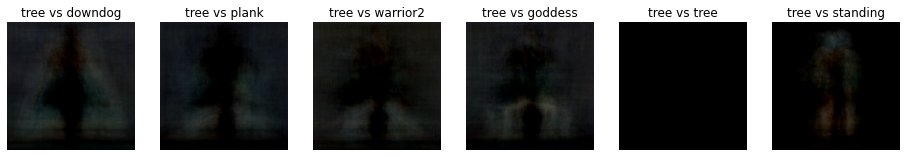

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


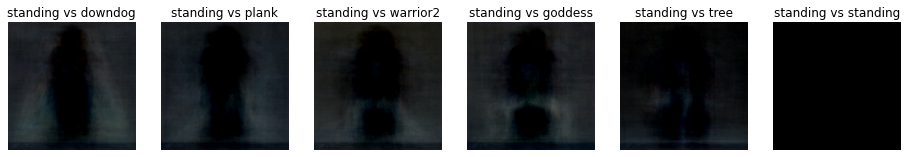

In [21]:
mean_images=[downdog_mean_512, plank_mean_512 , warrior2_mean_512 ,goddess_mean_512 ,tree_mean_512 ,standing_mean_512]
labels=['downdog', 'plank' , 'warrior2' ,'goddess' ,'tree' ,'standing']
n=len(mean_images)

for i in range(len(mean_images)):
    plt.figure(figsize=(16, 5))
    for j in range(len(mean_images)):
        contrast_mean = mean_images[i]-mean_images[j]
        plt.subplot(1, n, j + 1)
        plt.imshow(contrast_mean)
        plt.title(f'{labels[i]} vs {labels[j]}')
        plt.axis('off')
    plt.show()

In [22]:
#### mean image differences of size 800*800

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


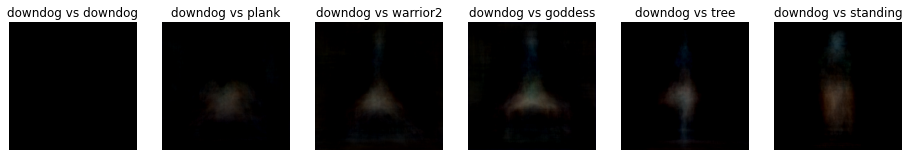

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


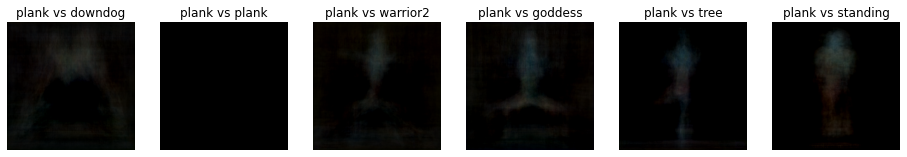

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


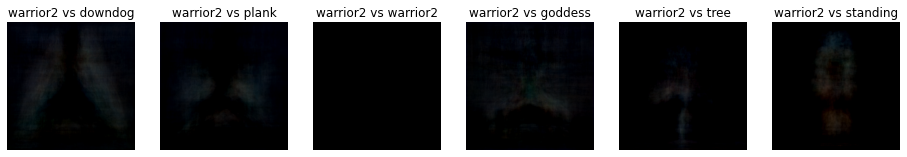

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


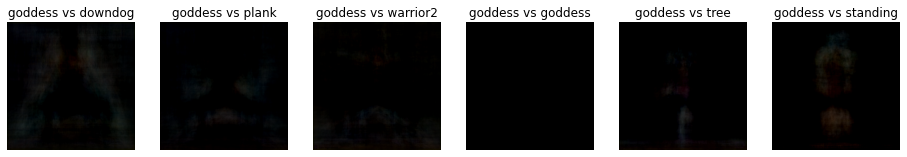

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


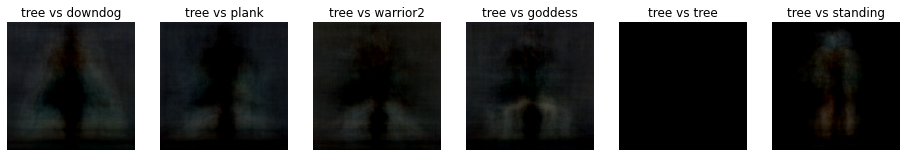

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


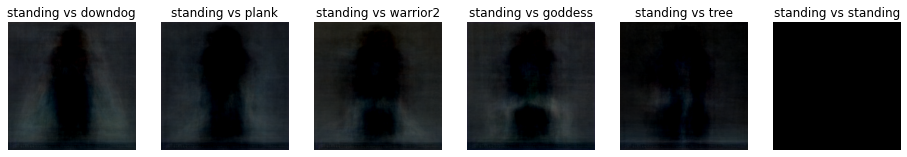

In [23]:
mean_images=[downdog_mean_800, plank_mean_800 , warrior2_mean_800 ,goddess_mean_800 ,tree_mean_800 ,standing_mean_800]
labels=['downdog', 'plank' , 'warrior2' ,'goddess' ,'tree' ,'standing']
n=len(mean_images)

for i in range(len(mean_images)):
    plt.figure(figsize=(16, 5))
    for j in range(len(mean_images)):
        contrast_mean = mean_images[i]-mean_images[j]
        plt.subplot(1, n, j + 1)
        plt.imshow(contrast_mean, cmap='bwr')
        plt.title(f'{labels[i]} vs {labels[j]}')
        plt.axis('off')
    plt.show()

### Observations:

1. By seeing the above plots, we can clearly classify the images from akll 6 poses.
2. The lighter or gray color pixels of the image are the pixels which differ from each other.
3. By analysing all the 3 sizes (256,256),(512,512),(800,800). we observe all have shown great results in differentiating from other class.
4. By considering the computation efficiency and low latency requirements I thought it would be better considering (256,256) as the target size for modelling.

#### Test data

In [24]:
BASE_PATH="C:/Users/HP/Downloads/case study2/DATASET/"
filenames,labels = [],[]

for dirname in os.listdir(f'{BASE_PATH}TEST'):
    for file in os.listdir(f'{BASE_PATH}TEST/{dirname}'):
        filenames.append(BASE_PATH+"TEST/"+dirname+"/"+file)
        labels.append(dirname)

df_test = pd.DataFrame(data={
    'filename': filenames,
    'labels': labels
})

In [25]:
df_test.head()

filename   labels
0  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog
1  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog
2  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog
3  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog
4  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog

In [26]:
df_test.labels.value_counts()

plank       115
warrior2    109
downdog      97
goddess      80
tree         69
standing     20
Name: labels, dtype: int64

In [27]:
test_labels=df_train.labels.value_counts().to_dict()
test_labels

{'plank': 266,
 'warrior2': 252,
 'downdog': 223,
 'goddess': 180,
 'tree': 159,
 'standing': 101}

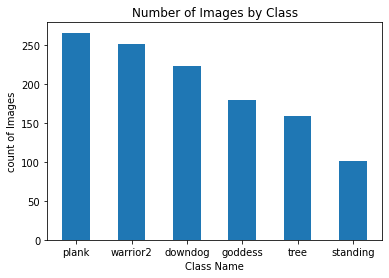

In [28]:
plt.bar(test_labels.keys(), test_labels.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('count of Images');

In [29]:
df_test['shape']=df_test['filename'].apply(get_dims)

In [30]:
df_test['height']=df_test['shape'].apply(lambda x: x[0])
df_test['width']=df_test['shape'].apply(lambda x: x[1])
df_test['channels']=df_test['shape'].apply(lambda x: x[2])
df_test['aspect_ratio']=df_test['shape'].apply(lambda x: x[1]/x[0])
df_test=df_test.drop(['shape'],axis=1)

In [31]:
df_test.head()

filename   labels  height  width  \
0  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog     720   1280   
1  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog     900   1600   
2  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog    1620   2224   
3  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog    1365   2048   
4  C:/Users/HP/Downloads/case study2/DATASET/TEST...  downdog     675   1200   

   channels  aspect_ratio  
0         3      1.777778  
1         3      1.777778  
2         3      1.372840  
3         3      1.500366  
4         3      1.777778

In [32]:
df_train['channels'].value_counts()

3    1123
4      43
1      15
Name: channels, dtype: int64

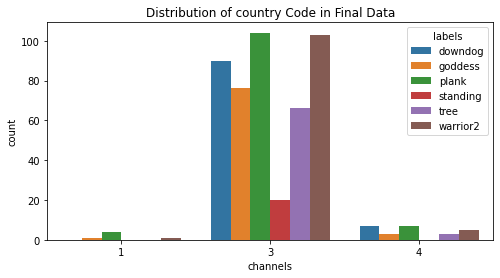

In [33]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='channels', data=df_test, hue='labels')
plt.title('Distribution of country Code in Final Data')
plt.show()

### Observations:
1. Most of the images in dataset have 3 channels
2. few images have 1 channel and few images contain algha channel also
3. All standing images are having 3 channels only

            height        width    channels  aspect_ratio
count   490.000000   490.000000  490.000000    490.000000
mean    912.930612  1142.677551    3.026531      1.309657
std     715.656873   907.701746    0.315435      0.395474
min     150.000000   171.000000    1.000000      0.504608
25%     461.250000   612.000000    3.000000      1.000000
50%     675.000000   851.500000    3.000000      1.333333
75%    1024.000000  1280.000000    3.000000      1.509342
max    5184.000000  6410.000000    4.000000      3.200000


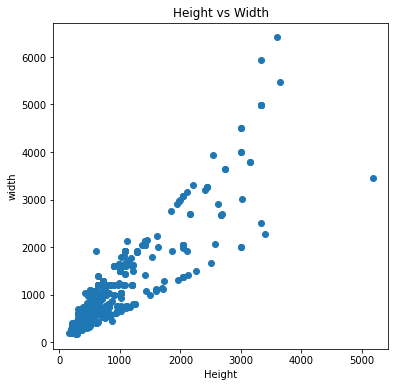

In [34]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(6,6))
print(df_test.describe())
plt.scatter(df_test.height,df_test.width)
plt.xlabel('Height')
plt.ylabel('width')
plt.title('Height vs Width')
plt.show()

############################## downdog ###################################
            height       width   channels  aspect_ratio
count    97.000000    97.00000  97.000000     97.000000
mean    808.567010  1170.57732   3.072165      1.478966
std     617.186727   839.34436   0.260105      0.269719
min     212.000000   300.00000   3.000000      0.769231
25%     450.000000   620.00000   3.000000      1.400000
50%     675.000000  1000.00000   3.000000      1.500000
75%     991.000000  1500.00000   3.000000      1.664985
max    3328.000000  4992.00000   4.000000      2.200000


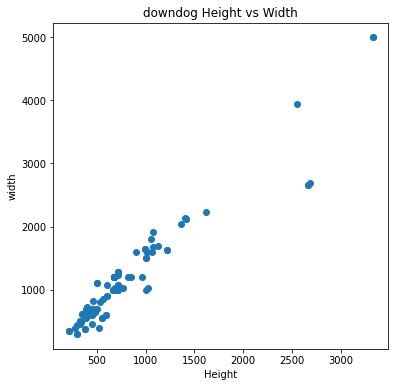

############################## goddess ###################################
            height        width   channels  aspect_ratio
count    80.000000    80.000000  80.000000     80.000000
mean    753.675000   909.387500   3.012500      1.294513
std     493.132836   534.153192   0.297404      0.343993
min     309.000000   298.000000   1.000000      0.666941
25%     437.000000   607.000000   3.000000      1.000000
50%     600.500000   743.000000   3.000000      1.332910
75%     854.750000  1024.000000   3.000000      1.500000
max    2448.000000  3264.000000   4.000000      2.278317


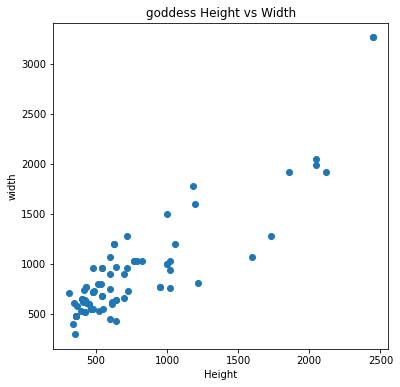

############################## plank ###################################
            height        width    channels  aspect_ratio
count   115.000000   115.000000  115.000000    115.000000
mean    958.026087  1344.391304    2.991304      1.468006
std     768.226249  1041.357580    0.449086      0.363512
min     150.000000   190.000000    1.000000      0.651982
25%     441.000000   673.000000    3.000000      1.220595
50%     700.000000  1078.000000    3.000000      1.500000
75%    1073.000000  1600.000000    3.000000      1.777778
max    3328.000000  4992.000000    4.000000      2.455635


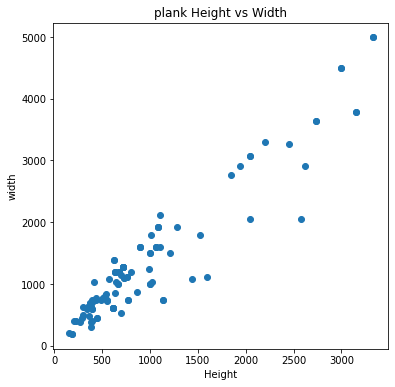

############################## standing ###################################
           height        width  channels  aspect_ratio
count    20.00000    20.000000      20.0     20.000000
mean    650.80000   495.450000       3.0      0.785326
std     763.89167   565.328826       0.0      0.248717
min     188.00000   171.000000       3.0      0.579661
25%     264.25000   187.500000       3.0      0.665455
50%     288.00000   223.500000       3.0      0.678559
75%     650.00000   681.000000       3.0      0.800797
max    3335.00000  2500.000000       3.0      1.500938


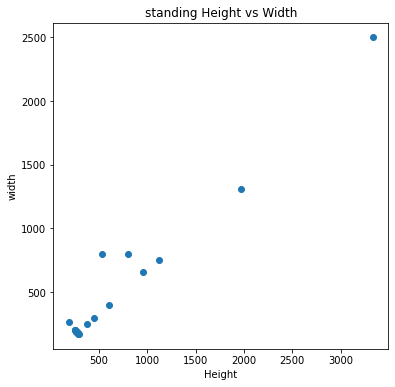

############################## tree ###################################
            height        width   channels  aspect_ratio
count    69.000000    69.000000  69.000000     69.000000
mean   1259.811594  1305.260870   3.043478      1.062557
std     961.897822  1171.764628   0.205425      0.422576
min     362.000000   327.000000   3.000000      0.504608
25%     576.000000   587.000000   3.000000      0.666992
50%     856.000000  1000.000000   3.000000      1.000000
75%    1719.000000  1366.000000   3.000000      1.488372
max    5184.000000  5930.000000   4.000000      1.963810


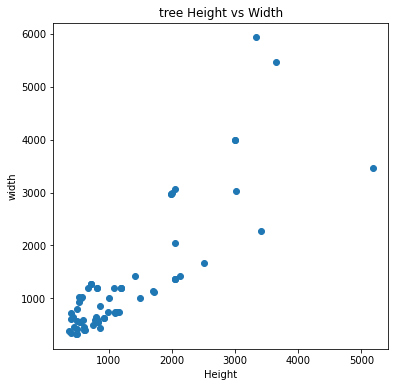

############################## warrior2 ###################################
            height        width    channels  aspect_ratio
count   109.000000   109.000000  109.000000    109.000000
mean    903.623853  1092.091743    3.027523      1.255667
std     611.464935   805.498288    0.287348      0.385546
min     190.000000   190.000000    1.000000      0.639648
25%     541.000000   631.000000    3.000000      1.000000
50%     760.000000   800.000000    3.000000      1.298354
75%    1080.000000  1200.000000    3.000000      1.485179
max    3605.000000  6410.000000    4.000000      3.200000


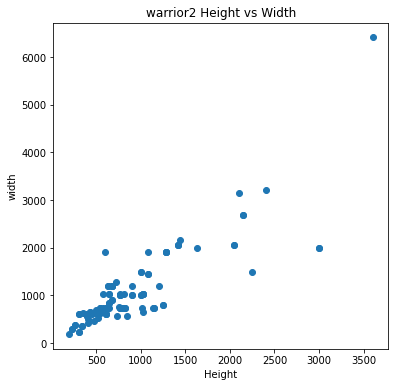

In [35]:
for label in list(df_test['labels'].unique()):
    plt.figure(figsize=(6,6))
    df=df_test[df_test['labels']==label]
    print("##############################",label,"###################################")
    print(df.describe())
    plt.scatter(df.height,df.width)
    plt.xlabel('Height')
    plt.ylabel('width')
    plt.title(label+' Height vs Width')
    plt.show()

### Observations:
1. we can see the height and width of images follows the same distribution in train and test data

#### Data Augmentation

In [36]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [37]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=16,
                                            class_mode='categorical',
                                            target_size=(512,512),
                                                    shuffle=True)


test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=16,
                                            class_mode='categorical',
                                                target_size=(512,512),
                                                    shuffle=False)

Found 1168 images belonging to 6 classes.
Found 486 images belonging to 6 classes.


In [38]:
train_generator.class_indices

{'downdog': 0,
 'goddess': 1,
 'plank': 2,
 'standing': 3,
 'tree': 4,
 'warrior2': 5}

In [39]:
train_generator[0][0].shape

C:\Users\HP\anaconda3\envs\tf-gpu1\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(16, 512, 512, 3)

#### display some random poses in train data

In [40]:
def visualize(images):
    for i, image in enumerate(images):
        plt.figure(figsize=(16, 5))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
    plt.show()

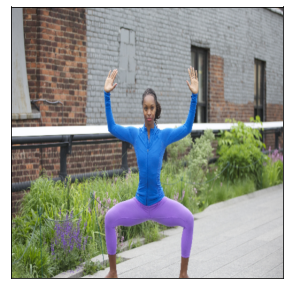

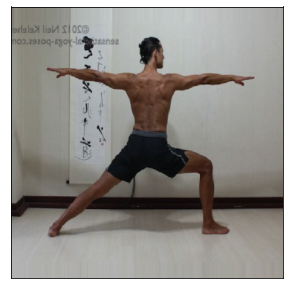

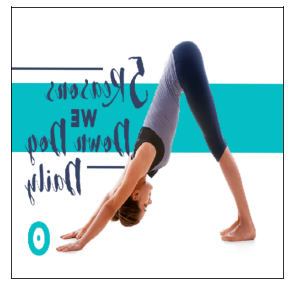

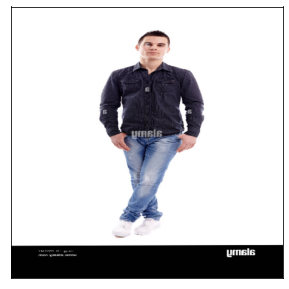

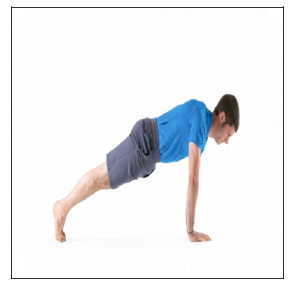

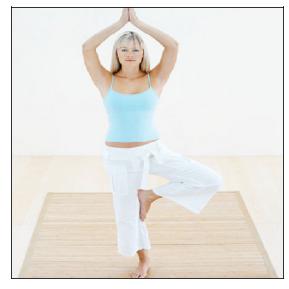

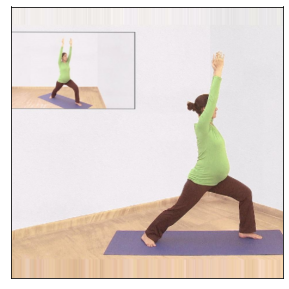

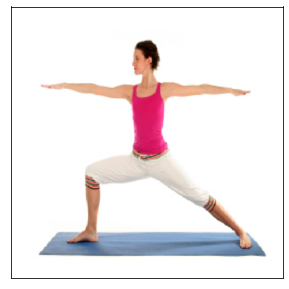

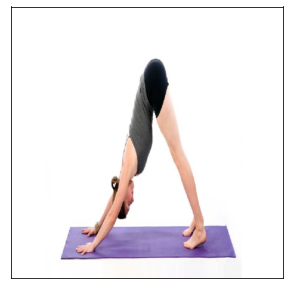

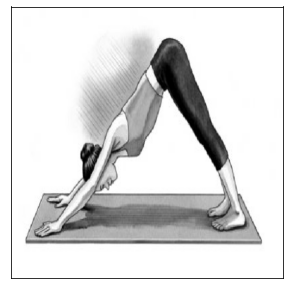

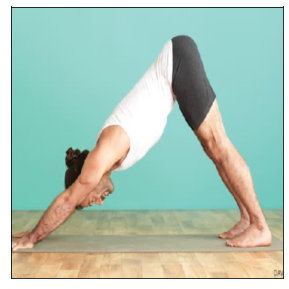

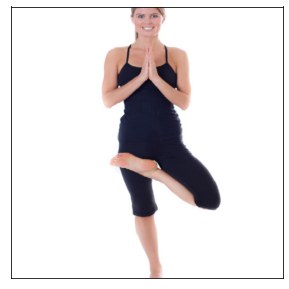

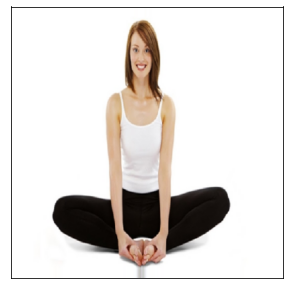

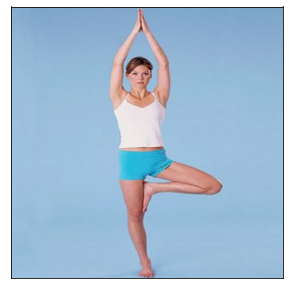

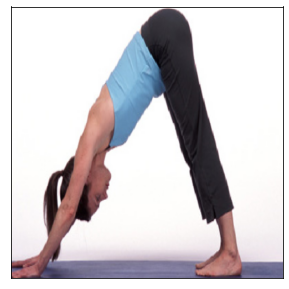

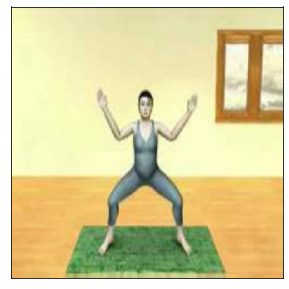

In [41]:
visualize(train_generator[0][0])